In [49]:
import pandas as pd
import numpy as np
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scipy
from scipy import stats as stats
%matplotlib inline

In [5]:
loc = 'https://raw.githubusercontent.com/gurkpet/Human-Resource/9a0d15f1cc27954cfa59a71825d15d131651923c/HR_comma_sep.csv'
df = pd.read_csv(loc, low_memory=False)

In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
list(df)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

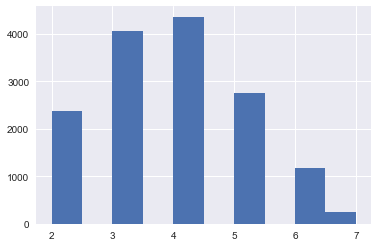

NormaltestResult(statistic=550.35948922210014, pvalue=3.0971011101662827e-120)

In [52]:
plt.hist(df['number_project'])
plt.show()
stats.normaltest(df['number_project'])

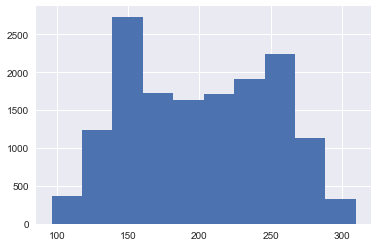

NormaltestResult(statistic=7806.4950177646797, pvalue=0.0)

In [53]:
plt.hist(df['average_montly_hours'])
plt.show()
stats.normaltest(df['average_montly_hours'])

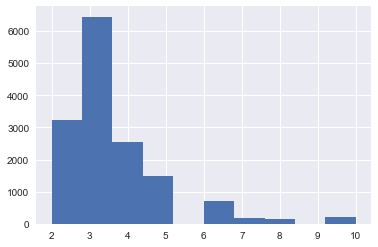

NormaltestResult(statistic=5642.288352081312, pvalue=0.0)

In [54]:
plt.hist(df['time_spend_company'])
plt.show()
stats.normaltest(df['time_spend_company'])

Histograms suggest only the number of projects is normally distributed.

In [83]:
print(ttest_ind(df['number_project'], df['time_spend_company']))
print(ttest_ind(df['number_project'], df['average_montly_hours']))
print(ttest_ind(df['average_montly_hours'], df['time_spend_company']))

Ttest_indResult(statistic=19.536753519083355, pvalue=1.7938911515378999e-84)
Ttest_indResult(statistic=-483.54229603425085, pvalue=0.0)
Ttest_indResult(statistic=484.23011415607965, pvalue=0.0)


Ttests indicate there is a correlation between all 3 sets of continuous data.

Using Number of Projects, Average Monthly Hours, and Time Spent in the Company as 3 continuous variables, and job ('sales') and salary as catigorical variables I would like to predect satisfaction level.

In [5]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [6]:
salesdic = {
        'sales':0,
        'accounting':1,
        'hr':2,
        'support':3,
        'management':4,
        'IT':5,
        'product_mng':6,
        'marketing':7,
        'RandD':8,
        'technical':9
}
salarydic = {
        'low':0,
        'medium':1,
        'high':2
}

In [7]:
df = df.replace({"sales":salesdic})

In [8]:
df = df.replace({"salary":salarydic})

In [9]:
data = df[['number_project', 'average_montly_hours', 'time_spend_company']]

In [10]:
X = pd.DataFrame(StandardScaler().fit_transform(data))

In [11]:
X = X.join(df['salary'])
X = X.join(df['sales'])
X = X.rename(columns={'sales': 'job'})

In [49]:
X.columns = ['number_project', 'average_montly_hours','time_spend_company','salary','job']
X.head()

,number_project,average_montly_hours,time_spend_company,salary,job
0,-1.462863,-0.882040,-0.341235,0,0
1,0.971113,1.220423,1.713436,1,0
2,2.593763,1.420657,0.343655,1,0
3,0.971113,0.439508,1.028546,0,0
4,-1.462863,-0.841993,-0.341235,0,0


In [54]:
Xt = X[[0,1,2]].T

In [55]:
Cx = np.cov(Xt)
pd.DataFrame(Cx)

,0,1,2
0,1.000067,0.417238,0.196799
1,0.417238,1.000067,0.127763
2,0.196799,0.127763,1.000067


In [52]:
sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X[[0,1,2]])

In [58]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 3).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

Eigenvector 1: 
[[-0.66103349]
 [-0.6311115 ]
 [-0.40587314]]
Eigenvalue 1: 1.5192528036060189
----------------------------------------
Eigenvector 2: 
[[-0.7260924 ]
 [ 0.67444613]
 [ 0.13383662]]
Eigenvalue 2: 0.5762311258631239
----------------------------------------
Eigenvector 3: 
[[-0.18927374]
 [-0.3831719 ]
 [ 0.90407674]]
Eigenvalue 3: 0.9047160972010766
----------------------------------------


In [53]:
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.50638384  0.30155193  0.19206424]
